In [226]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [227]:
#importing student_data
student_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [228]:
#check successful import
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


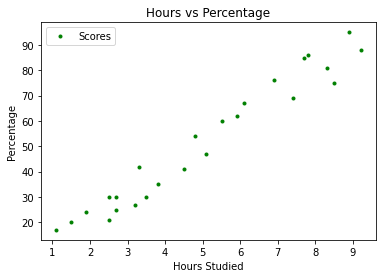

In [229]:
#plot the dataset for visualisation
student_data.plot(x='Hours',y='Scores',style=".", color="green")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

In [230]:
#Separate data into input and output data, i.e. hours studied is independent variable and Percentage is dependent

X = student_data.iloc[:,:1].values
Y = student_data.iloc[:,1].values
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [231]:
#split data into test and train sets
#use scikit learn library for this

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
print("X_train=",X_train,"\nX_test=",X_test,"\nY_train=",Y_train,"\nY_test=",Y_test)

X_train= [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] 
X_test= [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] 
Y_train= [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 
Y_test= [20 27 69 30 62]


In [232]:
#train the algorithm

from sklearn.linear_model import LinearRegression   #since it is a problem of linear regression, we'll train using the same
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

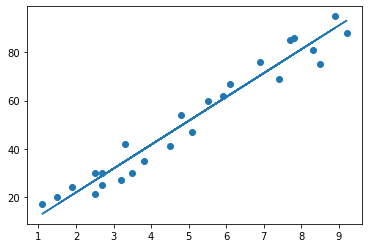

In [233]:
#Plot the regressor

line = regressor.coef_*X + regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [234]:
#Predictions
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores
print("\n",y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 [12.44258714 26.35944834 20.39507925 92.9615698  70.09815497]


In [235]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [236]:
#predicting score for 9.25 hours
hours = [[9.25]]            #shaping data to pass as argument
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [237]:
from sklearn import metrics

print("Mean absolute error=",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean squared error=", metrics.mean_squared_error(Y_test,Y_pred))
print("Root mean squared error=", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean absolute error= 4.183859899002975
Mean squared error= 21.5987693072174
Root mean squared error= 4.6474476121003665
